### Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


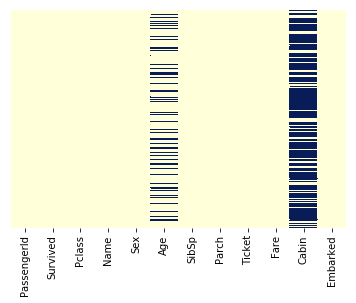

In [3]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="YlGnBu")

#### Data Imputation on Age Column

Since we have major portion of Age data available, we can fill in the missing data. This can be done in one way by filling the average age by passenger class in place of Nan.

In [4]:
# Calculation Age mean based on passenger class
ageMean = []
for i in range(1,4):
    m = int(data[(data['Pclass'] == i)]['Age'].dropna().mean())
    ageMean.append(m)    
print (ageMean)

[38, 29, 25]


In [5]:
def ageMean_fill(cols, avg):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return avg[0]

        elif Pclass == 2:
            return avg[1]

        else:
            return avg[2]

    else:
        return Age

In [6]:
# Applying the above defined function on the Age column
data['Age'] = data[['Age','Pclass']].apply(ageMean_fill, avg=ageMean,axis=1)

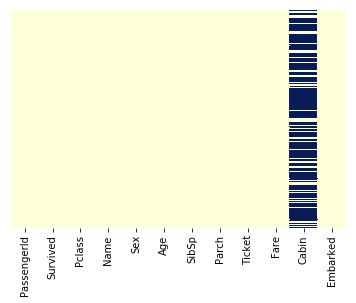

In [7]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="YlGnBu")

In [8]:
#Dropping Cabin column due to too many missing values
data.drop('Cabin',axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


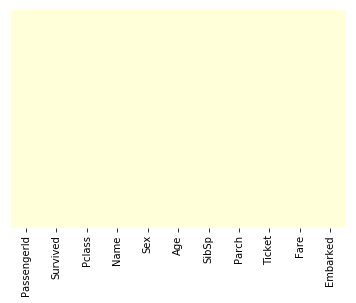

In [9]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="YlGnBu")

Perfect! Now there are no NaN values left!

#### Categorical Features

For features such as Sex and Embarked which contain string values, they needed to be converted into dummy variables such that model can interpret them.

In [10]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
#Concatinating new feature columns into original data frame
data = pd.concat([data,sex,embark],axis=1)

#Dropping features which are irrelevant or difficult to pass as input to the model
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
data.drop(['PassengerId'],axis=1,inplace=True)

data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


**Training data is now ready!**

### Training Model

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predictions

**Let's first predict on the test set created from training data.**

In [43]:
train_pred = logReg.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,train_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

   micro avg       0.77      0.77      0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test,train_pred)

array([[133,  21],
       [ 40,  74]], dtype=int64)

** Now let's import the test csv file and clean the data.**

In [21]:
test_data = pd.read_csv('titanic_test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


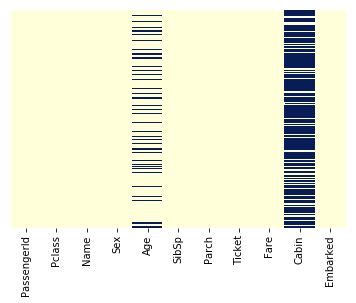

In [22]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")

We  have to apply same data cleaning process to our test data as well.

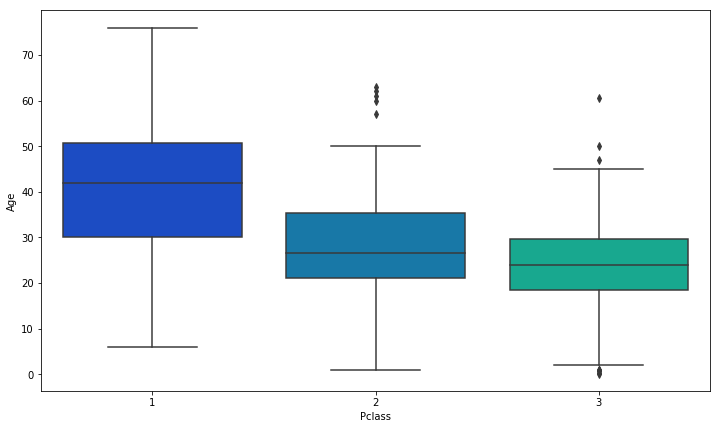

In [23]:
# Let's visualize distribution on age groups among passenger classes
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=test_data,palette='winter')

In [24]:
# Calculation Age mean based on passenger class
ageMean_test = []
for i in range(1,4):
    m = int(test_data[(test_data['Pclass'] == i)]['Age'].dropna().mean())
    ageMean_test.append(m)    
print (ageMean_test)

[40, 28, 24]


In [25]:
# Applying the same function on the Age column in test dataset
test_data['Age'] = test_data[['Age','Pclass']].apply(ageMean_fill, avg=ageMean_test,axis=1)

In [26]:
test_data.drop('Cabin', axis = 1,inplace=True)
test_data.drop('PassengerId', axis=1, inplace=True)

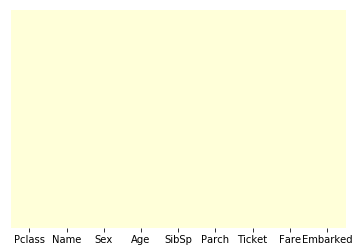

In [27]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")

In [28]:
# Converting Categorical Features
sex = pd.get_dummies(test_data['Sex'],drop_first=True)
embark = pd.get_dummies(test_data['Embarked'],drop_first=True)

In [29]:
#Concatinating new feature columns into original data frame
test_data = pd.concat([test_data,sex,embark],axis=1)

#Dropping features which are irrelevant or difficult to pass as input to the model
test_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

test_data.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [30]:
test_data.dropna(inplace=True)

**Prediction on Test Data**

In [31]:
survived_pred = logReg.predict(test_data)

In [32]:
test_data['prediction'] = survived_pred
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,prediction
0,3,34.5,0,0,7.8292,1,1,0,0
1,3,47.0,1,0,7.0000,0,0,1,0
2,2,62.0,0,0,9.6875,1,1,0,0
3,3,27.0,0,0,8.6625,1,0,1,0
4,3,22.0,1,1,12.2875,0,0,1,1


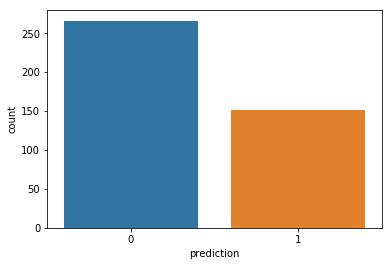

In [33]:
sns.countplot(x='prediction',data=test_data)

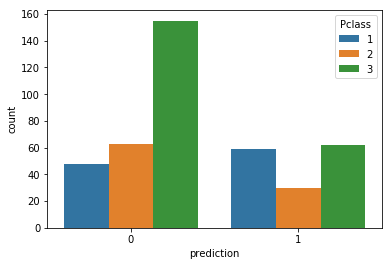

In [34]:
sns.countplot(x='prediction', data=test_data, hue='Pclass')

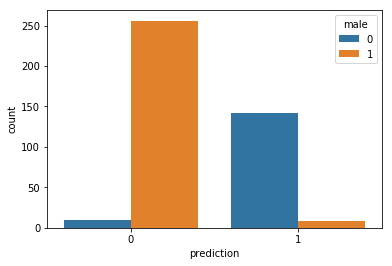

In [35]:
sns.countplot(x='prediction', data=test_data, hue='male')